<a href="https://colab.research.google.com/github/Aishu2029/Ecommerce/blob/main/ML_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title**

**Customer Behavior Analysis And Prediction System**

# **Business Problem**


A wholesale Distributer wants to understand customer purchasing behaviour and:

1.Predict whether a customer belongs to the Hotel Or Retail segment.

2.identify hidden customer  segment for targeted marketing

  you are hiered as a Data Scientist to build an end to end ML solution

# **Project** **Tasks**



# Part A-Data Understanding

1.Load the dataset and display basic information

2.identify:

          Feature
          Target Variable
          
3.Explain the difference between supervised and unsupervised learning dataset

In [ ]:
#Part A:-Understanding Dataset
#step1 import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
#uploading CSV file
from google.colab import files
uploaded=files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [ ]:
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:

#2 Identify features and target
X = df.drop(columns=["Channel"])  # Features
y = df["Channel"]                 # Target

print("Features (X):")
print(X)

print("\nTarget (y):")
print(y)

Features (X):
     Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0         3  12669   9656     7561     214              2674        1338
1         3   7057   9810     9568    1762              3293        1776
2         3   6353   8808     7684    2405              3516        7844
3         3  13265   1196     4221    6404               507        1788
4         3  22615   5410     7198    3915              1777        5185
..      ...    ...    ...      ...     ...               ...         ...
435       3  29703  12051    16027   13135               182        2204
436       3  39228   1431      764    4510                93        2346
437       3  14531  15488    30243     437             14841        1867
438       3  10290   1981     2232    1038               168        2125
439       3   2787   1698     2510      65               477          52

[440 rows x 7 columns]

Target (y):
0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
4

#Step3 Difference between supervised and unsupervised learning dataset


# *Supervised Learning:-*
    Supervised learning is a type of machine learning where a model is trained using a labeled dataset, meaning each input has a known output (target)



# How it work:-
    The model learns from existing data where the Channel is already known and then predicts the channel for new customers based on their spending.

    
# *Unsupervised Learning:
    Unsupervised learning is a learning method in which a model discovers hidden patterns, structures, or relationships in data without predefined labels.*


# How it works:-
    The model automatically groups customers based on similar purchasing behavior, without knowing their actual channel.


#Part B :Data Processing And Feature Engineering   


4.Create at least 3 meaningful feature from existing columns

5.Perform:

         Outlier detection
         Scaling of numerical feature
         Encoding if required


6.Analyze multicolinearity using correlation and VIF

       

In [ ]:
#Part B :Data Processing And Feature Engineering
#step1
#Create 3 meaningful features
# 1.fresh to grossary ratio
df["Fresh to Grocery Ratio"] = df["Fresh"] / df["Grocery"]

# 2. household product spending
df["Household_Spending"]=df["Grocery"]+df["Detergents_Paper"]

# 3. frozen spending share
df["Frozen_Share"] = df["Frozen"] / df["Milk"]

print(df[["Fresh to Grocery Ratio","Household_Spending","Frozen_Share"]])


     Fresh to Grocery Ratio  Household_Spending  Frozen_Share
0                  1.675572               10235      0.022162
1                  0.737563               12861      0.179613
2                  0.826783               11200      0.273047
3                  3.142620                4728      5.354515
4                  3.141845                8975      0.723660
..                      ...                 ...           ...
435                1.853310               16209      1.089951
436               51.345550                 857      3.151642
437                0.480475               45084      0.028215
438                4.610215                2400      0.523978
439                1.110359                2987      0.038280

[440 rows x 3 columns]


In [ ]:
#step 2: 1.Perform Outliers
# 5.Perform
#Outliers detection
Q1=df["Household_Spending"].quantile(0.25)
Q3=df["Household_Spending"].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("Lower Limit:",lower_limit)
print("Upper Limit:",upper_limit)

Lower Limit: -15362.875
Upper Limit: 32484.125


In [ ]:
#Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_cols = [
    'Fresh', 'Milk', 'Grocery',
    'Frozen', 'Detergents_Paper', 'Delicassen'
]
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh to Grocery Ratio,Household_Spending,Frozen_Share
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1.675572,10235,0.022162
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.737563,12861,0.179613
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.826783,11200,0.273047
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,3.142620,4728,5.354515
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,3.141845,8975,0.723660


# Encoding Is Not Required

**#Step3:Analyze multicolinearity using correalation or vi**f

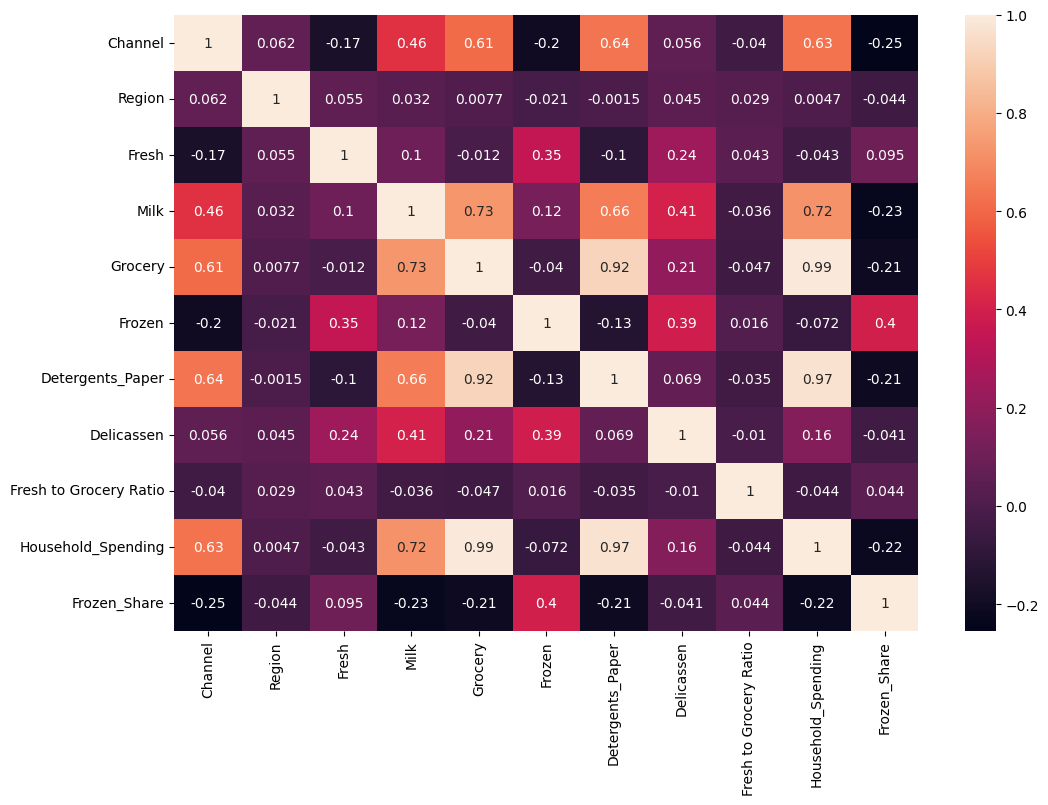

In [ ]:
#6 correlation & multicolinearity
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [ ]:

#Multicollinearity using VIF(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df[["Region","Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]

vif_data=pd.DataFrame()
vif_data["Features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

print("\nvariance inflation factor(VIF):")
print(vif_data)


variance inflation factor(VIF):
           Features        VIF
0            Region   2.476947
1             Fresh   2.209219
2              Milk   4.127912
3           Grocery  14.759219
4            Frozen   1.818881
5  Detergents_Paper  11.056107
6        Delicassen   1.964926


# #Part C:Regression Analysis

 7 Create a new target variable Total_Spend

 8 **Build:**

         Linear Regression model
         Multiple regression mode

9** Evalivate using:**

         MAE
         RMSE
         R^2 score

10 Apply Ridge or Lasso and compare performance
       


In [ ]:
#Create New Target Variable Total_spend
df['Total_Spend'] = (df['Fresh'] +df['Milk'] +df['Grocery'] +df['Frozen'] +df['Detergents_Paper'] +df['Delicassen'])
df[['Total_Spend']].head()

,Total_Spend
0,34112
1,33266
2,36610
3,27381
4,46100


In [ ]:
#Step8:Build
#Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# 9.Evalvuating using:
# 1.MAE(Mean Absolute Error)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

# 2.RMSE(Root mean square error)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",rmse)

# 3.R^2 Score
r2=r2_score(y_test,y_pred)
print("R^2 Score:",r2)

Mean Absolute Error: 0.2637323441961338
Root Mean Squared Error: 0.3150819525004071
R^2 Score: 0.4857536619979034


In [ ]:
#10.Apply Ridge or Lasso and compare Performance
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)



comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Lasso Regression'],
    'MAE': [mae_ridge, mae_lasso],
    'RMSE': [rmse_ridge, rmse_lasso],
    'R2 Score': [r2_ridge, r2_lasso]
})

comparison

,Model,MAE,RMSE,R2 Score
0,Ridge Regression,0.263713,0.315071,0.485790
1,Lasso Regression,0.262099,0.314327,0.488216


#Part D:Classification Modeling
# **11.Predict customer channel using**

*Logistic Regression

*Support Vector Machine

*Decision Tree

*Random Forest

*Gradient Boosting

# 12.Compare models using

*Accuracy

*Precision

*Recall

*F1-Source

*ROC-AUC Curve

In [ ]:
# 11.Customer Channel Prediction Using:
# 1.Logistic Regression
# 2.Support Vector Machine
# 3.Decision Tree
# 4.Random Forest
# 5.Gradient Boosting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X=df[["Region","Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]
y=df["Channel"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000), # Increased max_iter for convergence
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
for name, model in models.items():
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print(f"{name} predictions:", predictions[:5])

Logistic Regression predictions: [1 1 2 1 1]
SVM predictions: [2 1 2 1 1]
Decision Tree predictions: [2 1 2 1 1]
Random Forest predictions: [1 1 2 1 1]
Gradient Boosting predictions: [1 1 2 1 1]


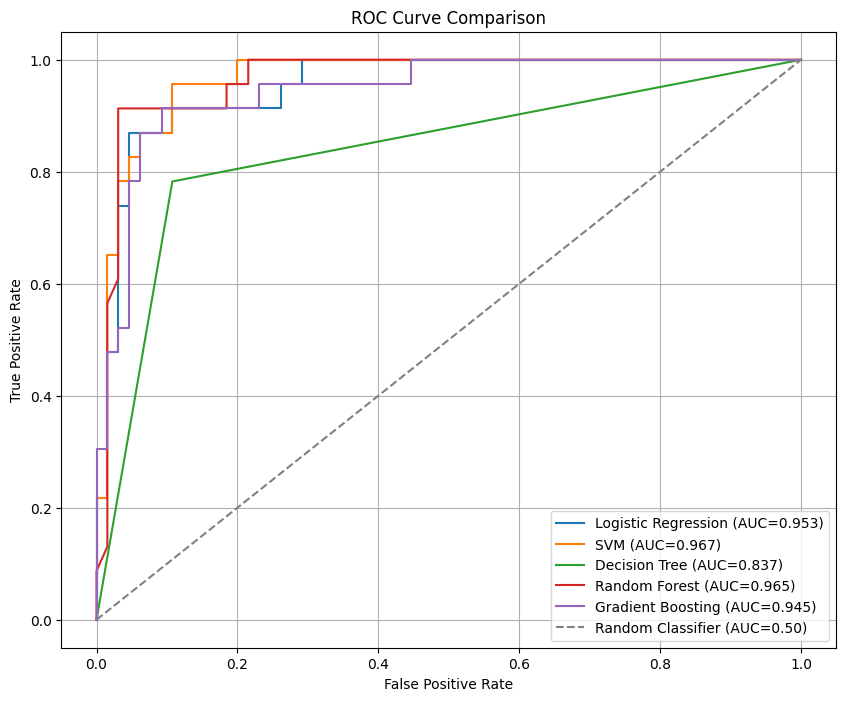

In [ ]:
#Compare model using
# 1.Accuracy
# 2.Precision
# 3.Recall
# 4.F1-Score
# ROC-AUC curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

results = []

plt.figure(figsize=(10, 8))  # Single figure for all ROC curves

for name, model in models.items():

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # If Channel labels are {1, 2}, convert to binary {0, 1}
    if set(y_test.unique()) == {1, 2}:
        y_test_binary = y_test.apply(lambda x: 1 if x == 2 else 0)
        fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
    else:
        fpr, tpr, _ = roc_curve(y_test, y_prob)

    roc_auc = auc(fpr, tpr)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append([name, acc, prec, rec, f1, roc_auc])

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

# Random classifier baseline
plt.plot([0, 1], [0, 1], linestyle="--", color='gray', label='Random Classifier (AUC=0.50)')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Part E:Unsupervised Learning


13.Apply K-means Clustering to segment customer

14.Use PCA to reduce dimension and visualize clusters






In [ ]:
#13.Apply K-Means Clustering To segment cutomers
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(X)
df['Cluster']=kmeans.labels_
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh to Grocery Ratio,Household_Spending,Frozen_Share,Total_Spend,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1.675572,10235,0.022162,34112,0
1,2,3,7057,9810,9568,1762,3293,1776,0.737563,12861,0.179613,33266,0
2,2,3,6353,8808,7684,2405,3516,7844,0.826783,11200,0.273047,36610,0
3,1,3,13265,1196,4221,6404,507,1788,3.142620,4728,5.354515,27381,0
4,2,3,22615,5410,7198,3915,1777,5185,3.141845,8975,0.723660,46100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1.853310,16209,1.089951,73302,1
436,1,3,39228,1431,764,4510,93,2346,51.345550,857,3.151642,48372,1
437,2,3,14531,15488,30243,437,14841,1867,0.480475,45084,0.028215,77407,0
438,1,3,10290,1981,2232,1038,168,2125,4.610215,2400,0.523978,17834,0


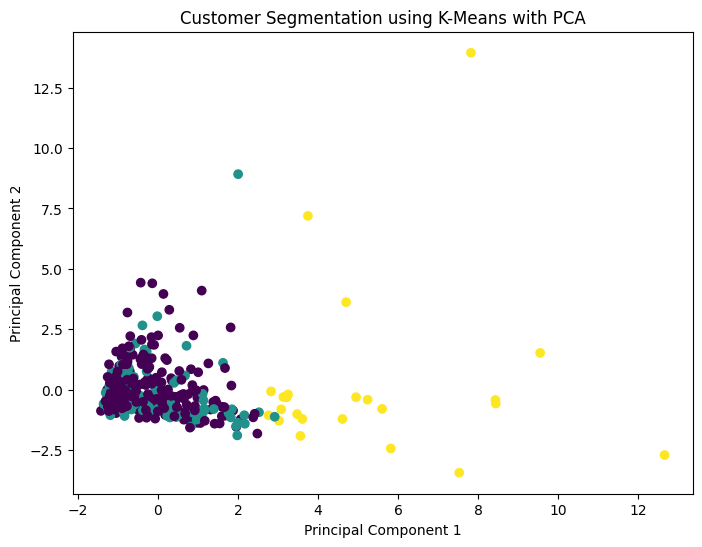

In [ ]:
#14.Use PCA Reduce dimension and visulize cluster
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation using K-Means with PCA')
plt.show()

# Part F: Model Evaluvation and Insight


**16.Explain:**

          Overfitting vs underfitting *bold text*

          Train vs Validation behaviour

          Impact of feature scaling
          
          Importance of handling class imbalance



**1.Underfitting And Overfitting:**



# Underfitting:

**What it is:**

Underfitting happens when a model is too simple to capture the underlying structure of the data.


# Why it happens:



Model is too simple (e.g., linear model for a highly nonlinear problem)



Not enough features



Insufficient training time



Too much regularization



# Example:


Fitting a straight line to data that clearly follows a curved pattern.
How to fix it:


Use a more complex model


Add better or more features


Reduce regularization


Train longer



# Overfitting

**What it is:**



Overfitting happens when a model learns the training data too well, including noise and random fluctuations, and fails to generalize.



**Why it happens:**



Model is too complex relative to the amount of data



Too many features



Training for too long



Too little regularization



# Example:


A high-degree polynomial that passes through every training point but behaves wildly between them.
How to fix it:







**Training vs Validation Data**


 **1.Training Data:** The dataset used to teach the model (fit parameters).


**2.Validation Data:** A separate dataset used to check the model’s

performance on unseen data while tuning hyperparameters.




** Impact of Feature Scaling **


**Feature scaling:** It is the process of normalizing or standardizing

numerical features so that they are on a similar scale.


 1.Min-Max Scaling: Scales values to a fixed range, usually [0,1].


 2.Standar Scaling: Centers values around 0 with unit variance.


 **Why Feature Scaling Matters:**


   1.Distance-based models:


*K-Nearest Neighbors (KNN)


*K-Means Clustering


*SVM with RBF kernel


2.Gradient-based models:


*Logistic Regression, Neural Network


3.Principal Component Analysis (PCA):


*Scales the data to avoid bias towards high-variance features.



**Importance of handling class imbalance**




**Class imbalance:** It occurs when one class has significantly more samples than another.


Example:


Fraud detection: 99% non-fraud, 1% fraud


Medical diagnosis: very few positive disease cases
